In [1]:
#!pip install wordcloud

In [2]:
#!pip install collections

In [3]:
#!pip install spacy

In [4]:
#from datascroller import scroll

import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
#import plotly.express as px
import plotly.graph_objects as go
#import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams


from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

import re
#from collections import Counter

import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [5]:
covid=pd.read_csv('covid19_tweets.csv')

In [6]:
covid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [7]:
print("Total number of records in data: ",len(covid))

Total number of records in data:  179108


In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [9]:
covid['user_location'].fillna('unknown', inplace=True)

In [10]:
#the count of tweets location wise
covid['user_location'].value_counts()

unknown                          36771
India                             3741
United States                     2455
New Delhi, India                  1721
Mumbai, India                     1401
                                 ...  
Unit 1 G/F 1322 Golden Empire        1
East and North Hertfordshire         1
💙Born in Venezuela/Spain🔨            1
Caldwell, ID                         1
Dera Ghazi Khan, Pakistan            1
Name: user_location, Length: 26921, dtype: int64

In [11]:
# Sentiment analysis

In [12]:
#!pip install vaderSentiment

In [13]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# or use nltk


#import nltk
#nltk.download('vader_lexicon')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

#analyser = SentimentIntensityAnalyzer()

In [14]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [15]:
#unigramdf
#Tokenizer
#We can't analyze whole sentences, we will use regex to tokenize sentences to list of words

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = covid['text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [If, I, smelled, the, scent, of, hand, sanitiz...
1    [Hey, Yankees, YankeesPR, and, MLB, wouldn, t,...
2    [diane3443, wdunlap, realDonaldTrump, Trump, n...
3    [brookbanktv, The, one, gift, COVID19, has, gi...
4    [25, July, Media, Bulletin, on, Novel, CoronaV...
Name: text, dtype: object

In [16]:
#When we split description into individual words, we have to create vocabulary and additionaly we can add new feature - description lengths

all_words = [word for tokens in words_descriptions for word in tokens]
covid['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))



3761888 words total, with a vocabulary size of 337922


In [17]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('t', 190012),
 ('co', 177780),
 ('https', 177297),
 ('the', 89608),
 ('COVID19', 80927),
 ('to', 73075),
 ('of', 58785),
 ('in', 50495),
 ('and', 42993),
 ('a', 42993),
 ('is', 32745),
 ('for', 29714),
 ('s', 25262),
 ('on', 22490),
 ('are', 18635),
 ('I', 17817),
 ('you', 17753),
 ('cases', 16715),
 ('The', 15747),
 ('with', 15737),
 ('that', 15072),
 ('from', 14689),
 ('have', 13863),
 ('this', 13054),
 ('amp', 12905),
 ('it', 12612),
 ('has', 12579),
 ('at', 11558),
 ('be', 11387),
 ('new', 10923),
 ('Covid19', 10919),
 ('19', 10473),
 ('we', 10226),
 ('as', 10094),
 ('coronavirus', 9928),
 ('by', 9704),
 ('your', 9655),
 ('COVID', 9504),
 ('covid19', 9331),
 ('people', 8455),
 ('not', 8446),
 ('will', 7986),
 ('our', 7887),
 ('can', 7786),
 ('all', 7430),
 ('about', 7384),
 ('We', 6885),
 ('more', 6879),
 ('pandemic', 6659),
 ('1', 6312),
 ('deaths', 6259),
 ('an', 5731),
 ('out', 5541),
 ('2020', 5529),
 ('been', 5519),
 ('A', 5493),
 ('how', 5449),
 ('but', 5380),
 ('was', 5229

In [18]:
#Applying VADER

covid['scores'] = covid['text'].apply(lambda review: analyser.polarity_scores(review))

covid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,description_lengths,scores
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,26,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp..."
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,26,"{'neg': 0.057, 'neu': 0.85, 'pos': 0.093, 'com..."
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,22,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp..."
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,24,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp..."
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,16,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou..."


In [19]:
covid['compound']  = covid['scores'].apply(lambda score_dict: score_dict['compound'])

covid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,description_lengths,scores,compound
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,26,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4939
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,26,"{'neg': 0.057, 'neu': 0.85, 'pos': 0.093, 'com...",0.2263
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,22,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2732
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,24,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",0.7351
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,16,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.3182


In [20]:
def Sentimnt(x):
    if x>= 0.05:
        return 0 #"Positive"
    elif x<= -0.05:
        return 2 #"Negative"
    else:
        return 1 #"Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
covid['Sentiment'] = covid['compound'].apply(Sentimnt)


covid.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,description_lengths,scores,compound,Sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,26,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4939,0
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,26,"{'neg': 0.057, 'neu': 0.85, 'pos': 0.093, 'com...",0.2263,0
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,22,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2732,2
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,24,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",0.7351,0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,16,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.3182,0


In [21]:
#save denitmes as a lable of tweets

covid.to_csv(r'C:\Users\DSU\003 covid19\senti_full.csv', columns= ['user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','hashtags','source','is_retweet','description_lengths','scores','compound','text', 'Sentiment'],index=False)

In [22]:
var1 = covid.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,text
0,0,69073
1,1,62199
2,2,47836


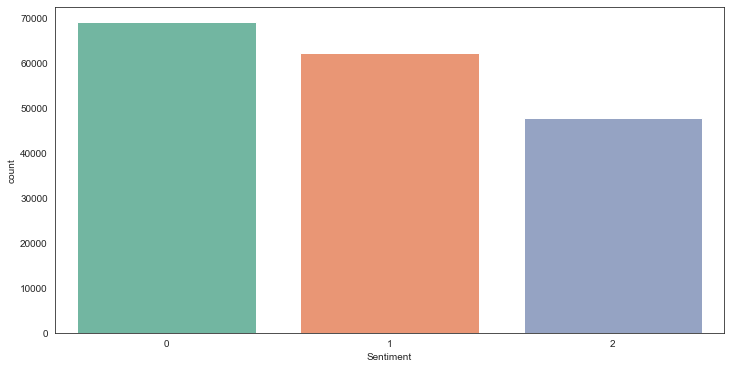

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=covid)

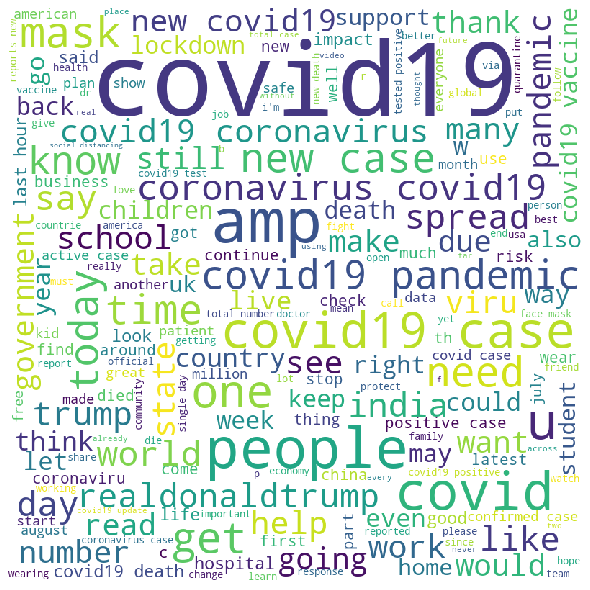

In [21]:
from nltk.corpus import stopwords 
comment_words = '' 
stopwords = set(stopwords.words('english')) #set(STOPWORDS) 



# iterate through the csv file 
for val in covid.text: 
      
    # typecaste each val to string 
    val = str(val)
    val = re.sub(r'^https?:\/\/.*[\r\n]*', '', val, flags=re.MULTILINE)
    val = re.sub(r'http\S+', '', val)
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

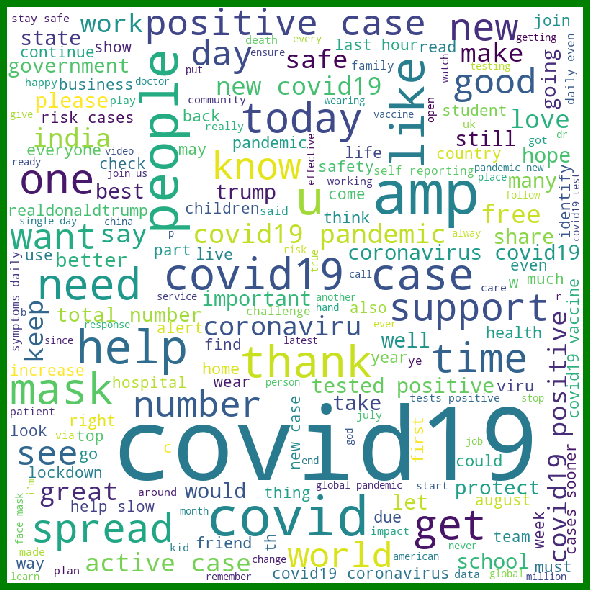

In [22]:
#Positive Wordcloud
from nltk.corpus import stopwords 
comment_words = '' 
stopwords = set(stopwords.words('english')) #stopwords = set(STOPWORDS) 
  
df_positive = covid[covid["Sentiment"]== 0] 
# iterate through the csv file 
for val in df_positive.text: 
      
    # typecaste each val to string 
    val = str(val)
    val = re.sub(r'^https?:\/\/.*[\r\n]*', '', val, flags=re.MULTILINE)
    val = re.sub(r'http\S+', '', val)
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('pos_c.png',dpi=300)  
plt.show() 

In [23]:
#'display.max_rows', 50, 'display.max_columns', None
#df_positive[['text','scores','compound','Sentiment']].head(5)
with pd.option_context('display.max_colwidth', -1 ):  # more options can be specified also
    print(df_positive[['text','scores','compound','Sentiment']].head(25))

                                                                                                                                                 text  \
0   If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0        
1   Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu        
3   @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW         
4   25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh         
8   Praying for good health and recovery of @ChouhanShivraj .\n#covid19\n#covidPositive                                                                 
9   POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at https://t.co/7X5RTy

In [24]:
#from IPython.display import display, HTML

#display(HTML(df_positive.to_html()))

In [25]:
#!pip install datascroller

In [26]:

#scroll(df_positive[['text','scores','compound','Sentiment']])

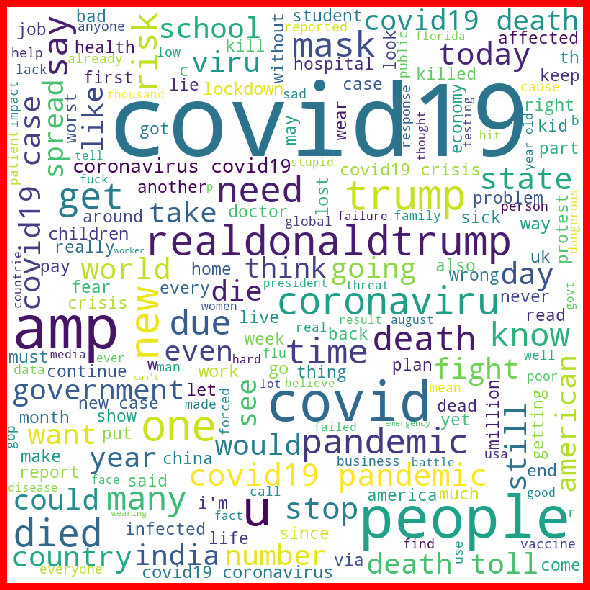

In [27]:
# Negative word cloud
from nltk.corpus import stopwords 
comment_words = '' 
stopwords = set(stopwords.words('english')) #stopwords = set(STOPWORDS) 
  
df_negative = covid[covid["Sentiment"]== 2 ] #"Negative"
# iterate through the csv file 
for val in df_negative.text: 
      
    # typecaste each val to string 
    val = str(val)
    val = re.sub(r'^https?:\/\/.*[\r\n]*', '', val, flags=re.MULTILINE)
    val = re.sub(r'http\S+', '', val)
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('neg_c.png',dpi=300)   
plt.show() 

In [28]:
with pd.option_context('display.max_colwidth', -1 ):  # more options can be specified also
    print(df_negative[['text','scores','compound','Sentiment']].head(35))

                                                                                                                                                   text  \
2    @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3         
5    #coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want… https://t.co/hXMHooXX2C         
10   49K+ Covid19 cases still no response from \n@cbseindia29 @HRDMinistry @DrRPNishank.Please cancel the compartment exa… https://t.co/kV2ZKmumu1        
18   It is during our darkest moments that we must focus to see the #light.~Aristotle \nhttps://t.co/YLlS4Kj85c… https://t.co/tFJB7l1Kaw                  
22   @JimBnntt Your image doesn't list a source, but I'd be careful with overall "risk of dying" statistics related to… https://t.co/GRjVq8vYMy           
27   I can imagine the same people profiting off the human suffering o

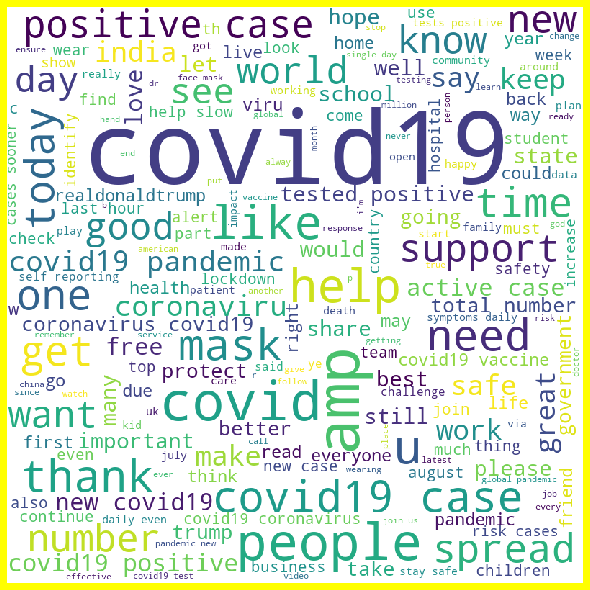

In [29]:
# neutral word cloud
from nltk.corpus import stopwords 
comment_words = '' 
stopwords = set(stopwords.words('english'))  #stopwords = set(STOPWORDS) 
  
df_neutral = covid[covid["Sentiment"]== 1] 
# iterate through the csv file 
for val in df_positive.text: 
      
    # typecaste each val to string 
    val = str(val)
    val = re.sub(r'^https?:\/\/.*[\r\n]*', '', val, flags=re.MULTILINE)
    val = re.sub(r'http\S+', '', val)
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "yellow") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('neu_c.png',dpi=300)    
plt.show() 

In [30]:
with pd.option_context('display.max_colwidth', -1 ):  # more options can be specified also
    print(df_neutral[['text','scores','compound','Sentiment']].head(15))

                                                                                                                                                text  \
6   How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK                 
7   You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy… https://t.co/OSu5Q4kdd7            
11  Order here: https://t.co/4NUrGX6EmA\n\n#logo #graphicdesigner #logodesign #logodesinger #icon  #minimalist #Abstract… https://t.co/0yPMoGqi9s      
14  Rajasthan Government today started a Plasma Bank at Sawai Man Singh Hospital in Jaipur for treatment of COVID-19 pa… https://t.co/cwfCcWyaDA       
15  Nagaland police on Covid-19 Awareness at City Tower Junction Dimapur.\n\n#Covid19 #keepsocialdistance… https://t.co/WOvFMqhuEO                     
16  July 25 #COVID19 update\n#TamilNadu - 6988\nDischarge- 7758\nPeople tested - 61729\n